<a href="https://colab.research.google.com/github/shubham-hub/EDA-of-IPL/blob/main/EDA_of_IPL_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ipl = pd.read_csv('/content/drive/MyDrive/EDA Projects /Exploratory Data Analysis(EDA) of IPL dataset/matches.csv')

In [ ]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
ipl.shape

(636, 18)

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [ ]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


##**Exploratory Data Analysis**
Let's begin some exploratory data analysis! We will start by checking out missing data


##**Missing data**
We can use seaborn to create a simple heatmap to see where we are missing data

In [ ]:
ipl.isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
633,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


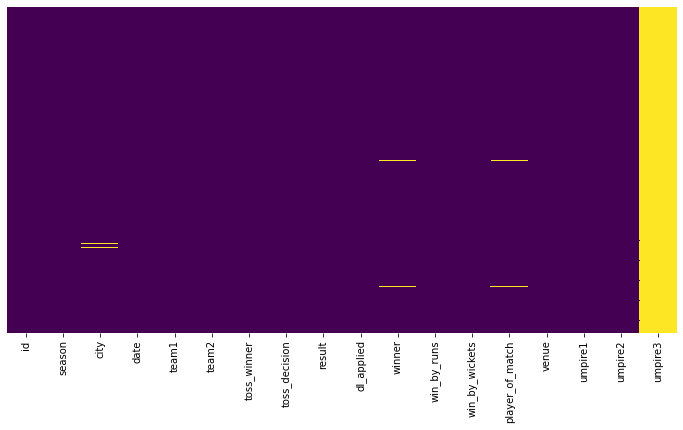

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(ipl.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
#getting the frequency of most man of the match awards 
ipl['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
                  ..
CR Brathwaite      1
DJ Hooda           1
MF Maharoof        1
RE Levi            1
S Badrinath        1
Name: player_of_match, Length: 201, dtype: int64

In [ ]:
ipl['player_of_match'].value_counts()[0:5]

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
Name: player_of_match, dtype: int64

In [ ]:
list(ipl['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'YK Pathan', 'DA Warner', 'AB de Villiers', 'SK Raina']

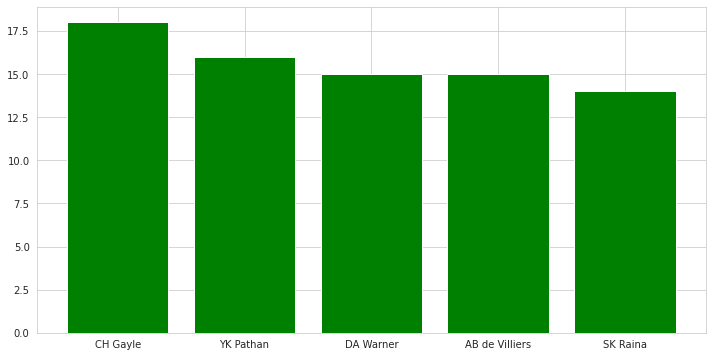

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]), color='g')
plt.show()

In [ ]:
ipl['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [52]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [54]:
ipl[ipl['win_by_runs']!=0]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin,NaN
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
